In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Генерация данных
np.random.seed(42)
x = np.linspace(-10, 10, 500).reshape(-1, 1)
y = np.sin(x) + 0.1 * x**2

In [3]:
# Преобразование данных в тензоры PyTorch
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [4]:
# Определение нейронной сети
class FunctionApproximator(nn.Module):
    def __init__(self):
        super(FunctionApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# Создание модели и определение функции потерь и оптимизатора
model = FunctionApproximator()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Epoch 0, Loss: 25.7130
Epoch 500, Loss: 0.0473
Epoch 1000, Loss: 0.0405
Epoch 1500, Loss: 0.0397
Epoch 2000, Loss: 0.0343
Epoch 2500, Loss: 0.0021
Epoch 3000, Loss: 0.0013
Epoch 3500, Loss: 0.0046
Epoch 4000, Loss: 0.0012
Epoch 4500, Loss: 0.0008


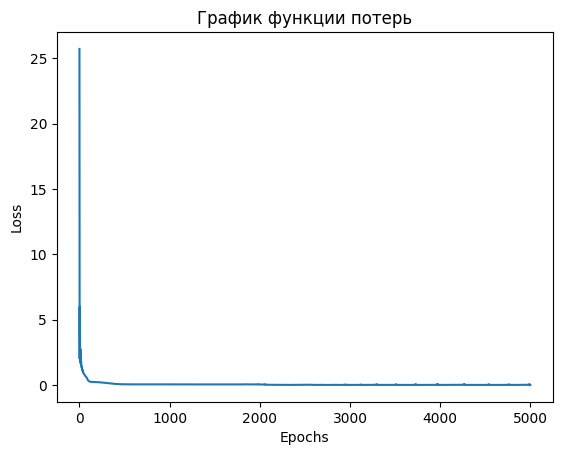

In [6]:
# Обучение модели
epochs = 5000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Визуализация функции потерь
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("График функции потерь")
plt.show()

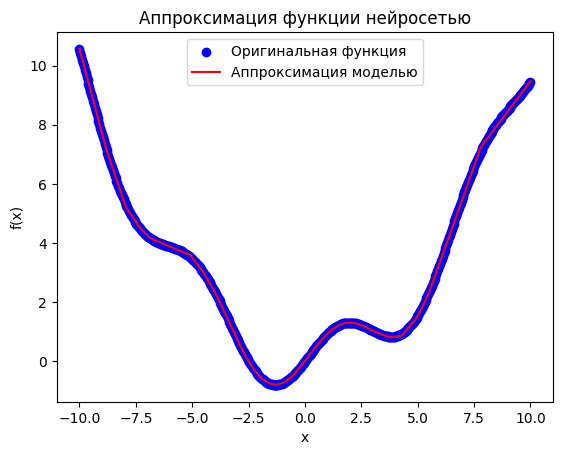

In [7]:
# Проверка модели
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

# Визуализация результата
plt.scatter(x, y, label="Оригинальная функция", color='blue')
plt.plot(x, y_pred, label="Аппроксимация моделью", color='red')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Аппроксимация функции нейросетью")
plt.show()